# Post Test 5 | Supervised Learning
#### Nama   : Novia Indah Ramadhani
#### NIM    : 2109106041
#### Kelas  : A2 2021
### Dataset : Brain Stroke
#### Link   : https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset_split = pd.read_csv("brain_stroke.csv")

dataset_split.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
dataset_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
print("Cek data dengan nilai NULL :")
dataset_split.isna().sum()

Cek data dengan nilai NULL :


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
print ("Cek data duplikat :")
dataset_split.duplicated().sum()

Cek data duplikat :


0

In [65]:
dataset_split['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

## Data Splitting
#### Melakukan data splitting

In [66]:
x = dataset_split[['age', 'avg_glucose_level', 'bmi', 'stroke']]
y = dataset_split['work_type']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
# Menggunakan random state = 0 agar akurasinya bernilai sama = tidak menggunakan sheetnya yang berbeda
# Menggunakan test size 20%
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2, 
    random_state=0
)

## Gunakan minimal 2 algoritma untuk membandingkan score/hasil terbaiknya.

### 1) Algoritma KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
model_knn = KNeighborsClassifier(n_neighbors = 5)

In [71]:
# Fitting datanya yg udah displit ke dalam datanya
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

#### Akurasi Training & Testing Set menggunakan KNN

In [72]:
# Lihat akurasi
print(f'Nilai akurasi training set = {model_knn.score(x_train, y_train)}')
print(f'Nilai akurasi testing set = {model_knn.score(x_test, y_test)}')

Nilai akurasi training set = 0.7351907630522089
Nilai akurasi testing set = 0.6469408224674023


#### Melakukan prediksi pada data

In [73]:
bmi = [[36.6, 32.5, 34.4, 24.0]]

model_knn.predict(bmi)

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Private'], dtype=object)

### 2) Algoritma Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
# Note KNN DT x,y
model_dt = DecisionTreeClassifier().fit(x_train, y_train)

#### Akurasi Training & Testing Set dengan Decision Tree

In [77]:
# Lihat akurasi
print(f'Nilai akurasi training set = {model_dt.score(x_train, y_train)}')
print(f'Nilai akurasi testing set = {model_dt.score(x_test, y_test)}')

Nilai akurasi training set = 1.0
Nilai akurasi testing set = 0.5626880641925778


#### Visualisasi

In [78]:
import matplotlib.pyplot as plt
from sklearn import tree

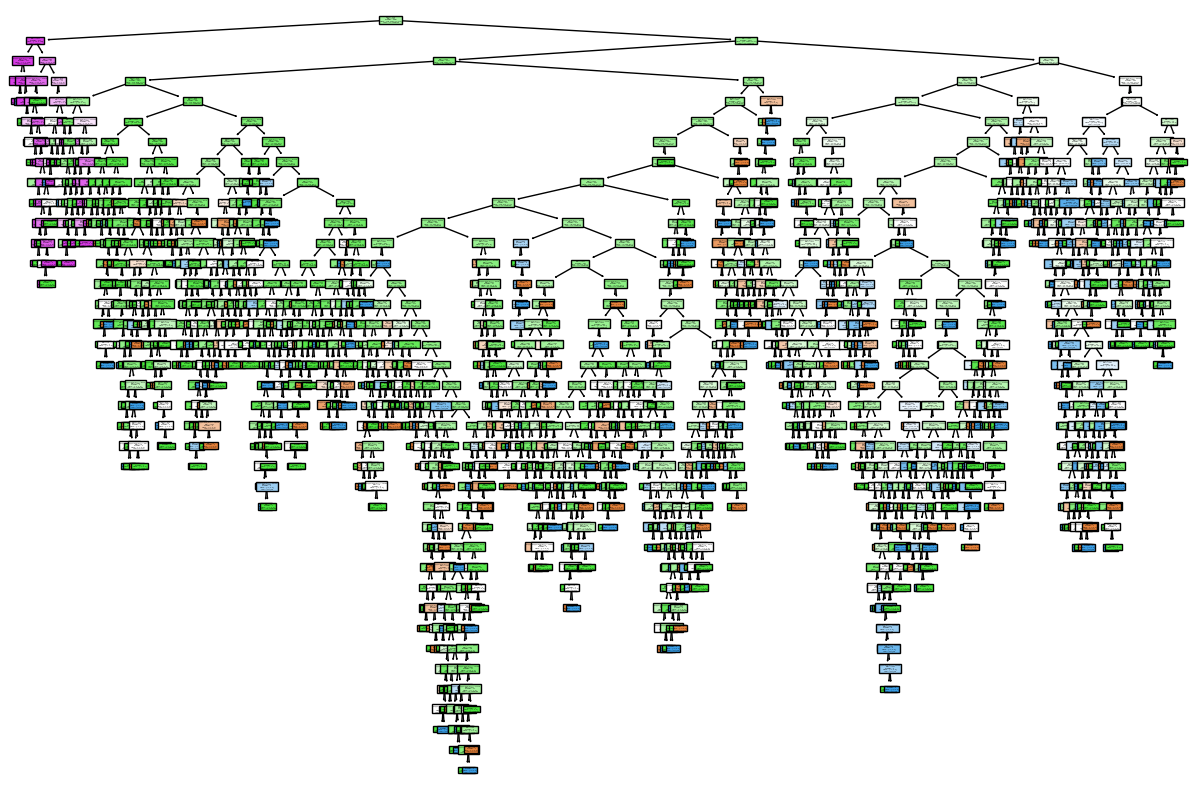

In [19]:
plt.figure(figsize = (15, 10))
tree.plot_tree(
    model_dt,
    feature_names = x.columns,
    filled = True,
    class_names = y.unique()
)
plt.show()

### 3) Algoritma Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [21]:
gnb = GaussianNB().fit(x_train, y_train)

In [22]:
gnb_predict_train = gnb.predict(x_train)
gnb_predict_test = gnb.predict(x_test)

In [23]:
print(f'Nilai akurasi Training = {accuracy_score(gnb_predict_train, y_train)}')
print(f'Nilai akurasi Testing = {accuracy_score(gnb_predict_test, y_test)}')

Nilai akurasi Training = 0.651355421686747
Nilai akurasi Testing = 0.6639919759277834


## Perbandingan Score

In [118]:
print("Algoritma KNN")
print(f'Nilai akurasi training set = {model_knn.score(x_train, y_train)}')
print(f'Nilai akurasi testing set = {model_knn.score(x_test, y_test)}')
print("\n")

print("Algoritma Decision Tree")
print(f'Nilai akurasi training set = {model_dt.score(x_train, y_train)}')
print(f'Nilai akurasi testing set = {model_dt.score(x_test, y_test)}')
print("\n")

print("Algoritma Naive Bayes")
print(f'Nilai akurasi Training = {accuracy_score(gnb_predict_train, y_train)}')
print(f'Nilai akurasi Testing = {accuracy_score(gnb_predict_test, y_test)}')

Algoritma KNN
Nilai akurasi training set = 0.7351907630522089
Nilai akurasi testing set = 0.6469408224674023


Algoritma Decision Tree
Nilai akurasi training set = 1.0
Nilai akurasi testing set = 0.5626880641925778


Algoritma Naive Bayes
Nilai akurasi Training = 0.651355421686747
Nilai akurasi Testing = 0.6639919759277834


#### Jadi, kesimpulan dari perbandingan score pada algoritma-algoritma yang digunakan pada dataset yang meraih nilai akurasi terefektif adalah Algoritma Naive Bayes, di mana nilai testing > nilai training

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [106]:
# cm_predict = KNN 
cm_predict = model_knn.predict(x_test)

In [107]:
cm = confusion_matrix(y_test, cm_predict)
cm

array([[ 17,  93,  12,   0],
       [ 60, 484,  42,   4],
       [ 15, 119,  18,   3],
       [  0,   4,   0, 126]], dtype=int64)

### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
dataset_split.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [93]:
# LR X,Y

X = dataset_split[['avg_glucose_level']] #predictor
Y = dataset_split[['bmi']] #target

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, 
    Y, 
    test_size = 0.3, 
    random_state = 0
)

In [95]:
model_lr = LinearRegression().fit(X_train, Y_train)

In [96]:
lr_predict = model_lr.predict(X_test)

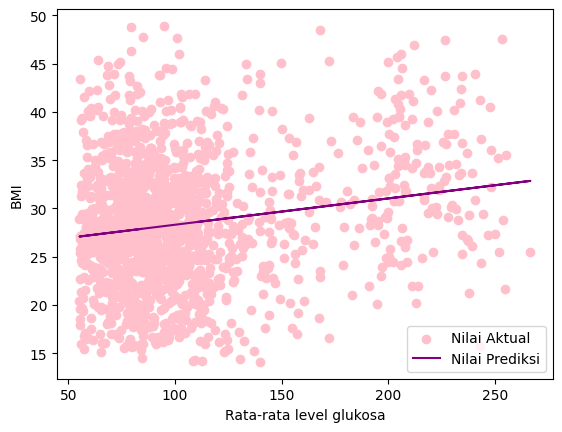

In [119]:
# Akurasi
plt.scatter(
    X_test, 
    Y_test, 
    color = "pink",
    label = "Nilai Aktual"
)

plt.plot(
    X_test,
    lr_predict,
    color = "purple",
    label = "Nilai Prediksi"
)
plt.xlabel("Rata-rata level glukosa")
plt.ylabel("BMI")
plt.legend()

plt.show()

In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_test, cm_predict))

print("\n")
      
print(classification_report(y_test, cm_predict2))

               precision    recall  f1-score   support

     Govt_job       0.18      0.14      0.16       122
      Private       0.69      0.82      0.75       590
Self-employed       0.25      0.12      0.16       155
     children       0.95      0.97      0.96       130

     accuracy                           0.65       997
    macro avg       0.52      0.51      0.51       997
 weighted avg       0.59      0.65      0.61       997



               precision    recall  f1-score   support

     Govt_job       0.00      0.00      0.00       122
      Private       0.68      0.88      0.77       590
Self-employed       0.26      0.15      0.19       155
     children       0.84      0.97      0.90       130

     accuracy                           0.67       997
    macro avg       0.45      0.50      0.46       997
 weighted avg       0.55      0.67      0.60       997



C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Tampilkan visualisasi dari model-model tersebut untuk regression.

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from prettytable import PrettyTable

In [81]:
mse = mean_squared_error(Y_test, lr_predict)
rmse = mean_squared_error (
    Y_test, 
    lr_predict, 
    squared = False
)
r_2 = model_lr.score(X_test, Y_test)
mae = mean_absolute_error(Y_test, lr_predict)


table = PrettyTable(["Nilai MSE", "Nilai RMSE", "Nilai R2", "Nilai MAE"])
table.allign = "l"

table.add_row([mse, rmse, r_2, mae])

print(table)

+--------------------+-------------------+---------------------+-------------------+
|     Nilai MSE      |     Nilai RMSE    |       Nilai R2      |     Nilai MAE     |
+--------------------+-------------------+---------------------+-------------------+
| 1884.9845903597604 | 43.41640922922761 | 0.05636114032080941 | 32.31833828011761 |
+--------------------+-------------------+---------------------+-------------------+
